In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [69]:
class Boosting:
    
    def __init__(
        self,
        base_model_class=DecisionTreeRegressor,
        base_model_params: dict={'max_depth': 2},
        n_estimators: int=10,
        learning_rate: float=0.1,
    ):
        
        # Класс базовой модели
        self.base_model_class = base_model_class
        # Параметры для инициализации базовой модели
        self.base_model_params = base_model_params
        # Число базовых моделей
        self.n_estimators = n_estimators
        # Длина шага (которая в лекциях обозначалась через eta)
        self.learning_rate = learning_rate
                
        # Плейсхолдер для нулевой модели
        self.initial_model_pred = None
        
        # Создаем список базовых моделей
        self.models = [self.base_model_class(**self.base_model_params) for _ in range(self.n_estimators)]
        
        # self.loss_mse = lambda y, z: np.mean((y-z)**2)
        # self.loss_der = lambda y, z: z - y
        
        # self.loss_der = lambda y, z: np.sign(z - y)
        self.sigmoid = lambda z: 1 / (1 + np.exp(-z))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_der = lambda y, z: -np.log(self.sigmoid(y * z))
        
    def _fit_new_model(self, X: np.ndarray, y: np.ndarray or list, n_model: int):
        """
        Функция для обучения одной базовой модели бустинга
        :param X: матрица признаков
        :param y: вектор целевой переменной
        :param n_model: номер модели, которую хотим обучить
        """
        self.models[n_model].fit(X, y)
        # Your code is here ╰( ͡° ͜ʖ ͡° )つ──☆*:
        
        
    def _fit_initial_model(self, X, y):
        """
        Функция для построения нулевой (простой) модели. Не забудьте взять логарифм, потому что сигмоида применяется
        уже к сумме предсказаний базовых моделей, а не к каждому предсказанию каждой модели по отдельности.
        Подойдёт константная модель, возвращающая самый популярный класс,
        но если хотите, можете сделать что-нибудь посложнее.
        """
        self.initial_model_pred = np.zeros(y.shape[0])
        # Your code here ╰( ͡° ͜ʖ ͡° )つ──☆*:      
        
    def fit(self, X, y, eval_set=None):
        """
        Функция для обучения всей модели бустинга
        :param X: матрица признаков
        :param y: вектор целевой переменной
        :eval_set: кортеж (X_val, y_val) для контроля процесса обучения или None, если контроль не используется
        """
        self._fit_initial_model(X, y)
        s = y * self.learning_rate * self.loss_der(y, self.initial_model_pred)
        for i in range(self.n_estimators):
            self._fit_new_model(X, s, i)
            an = np.zeros(y.shape[0])
            for k in range(i):
                an += self.models[k].predict(X)
            s = y * self.loss_der(y, an) * self.learning_rate
        # Your code here ╰( ͡° ͜ʖ ͡° )つ──☆*:
        
        
    def predict(self, X: np.ndarray):
        """
        Функция для предсказания классов обученной моделью бустинга
        :param X: матрица признаков
        """
        y = np.zeros(X.shape[0])
        for i in range(self.n_estimators):
            y += self.models[i].predict(X)
        y = np.round(self.sigmoid(y), 0) * 2 - 1
        return y



parab = lambda x: x**2 + 2

x_train = np.linspace(-10, 10, 10)
y_train = np.sign(x_train)
x_train = x_train[:, np.newaxis]
boost = Boosting(n_estimators=10, learning_rate=0.1, base_model_params={'max_depth': 3})
boost.fit(x_train, y_train)

x_test = np.linspace(-10, 10, 6)[:, np.newaxis]
boost.predict(x_test)

array([-1., -1., -1.,  1.,  1.,  1.])

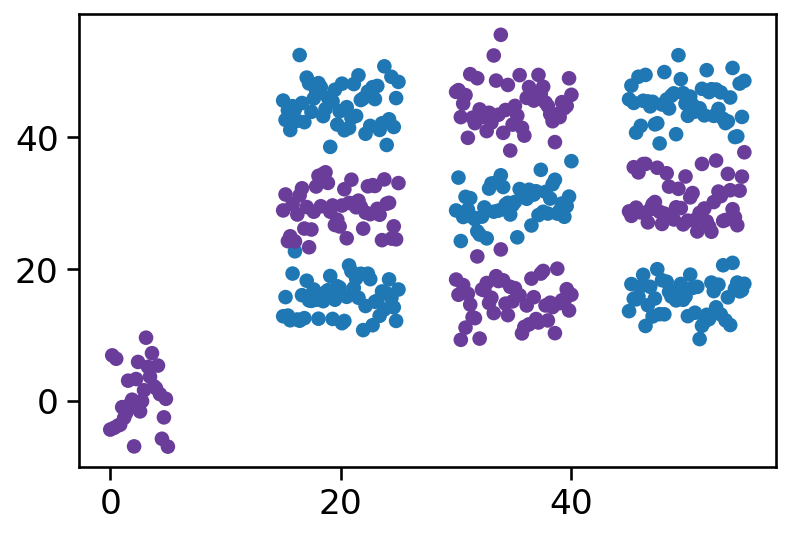

In [77]:
def make_clusters(wide, height, size, x0=0, y=0, mark=-1):
    x=np.linspace(x0, x0+wide, size)
    y=np.random.normal(y, height, size=(size,))
    mark = np.ones(size, dtype='int32') * mark
    return pd.DataFrame({'x1': x, 'x2': y, 'mark': mark})
    


colors = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])
data = make_clusters(5, 5, 30)
n = 1
for i in range(3):
    for j in range(3):
        data = pd.concat( (data, make_clusters(10, 3, 50, (i+1)*15, (j+1)*15, (n%2)*2 - 1) ), ignore_index=True)
        n+=1

fig, ax = plt.subplots(dpi=150)
ax.scatter(data.x1, data.x2, c=colors[data.mark])


In [109]:
boost = Boosting(n_estimators=100, learning_rate=0.1, base_model_params={'max_depth': 4})
boost.fit(data.drop(columns=['mark']), data['mark'])

# x_test = make_clusters(50, 15, 500, 10, 22).drop(columns=['mark'])
xx, yy = np.meshgrid(np.linspace(-2, 60, 50), np.linspace(-20, 60, 50)) 
# fig, ax = plt.subplots(dpi=150)
predicted = boost.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# ax.scatter(x_test.x1, x_test.x2, c=colors[np.array(boost.predict(x_test), dtype='int32')], s=0.5)
# ax.scatter(data.x1, data.x2, c=colors[data.mark], alpha=0.1)

D:\ProgrammFiles\Anaconda\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
D:\ProgrammFiles\Anaconda\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
D:\ProgrammFiles\Anaconda\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
D:\ProgrammFiles\Anaconda\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
D:\ProgrammFiles\Anaconda\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
D:\ProgrammFiles\Anaconda\lib\site-packages\sklearn\base.py:

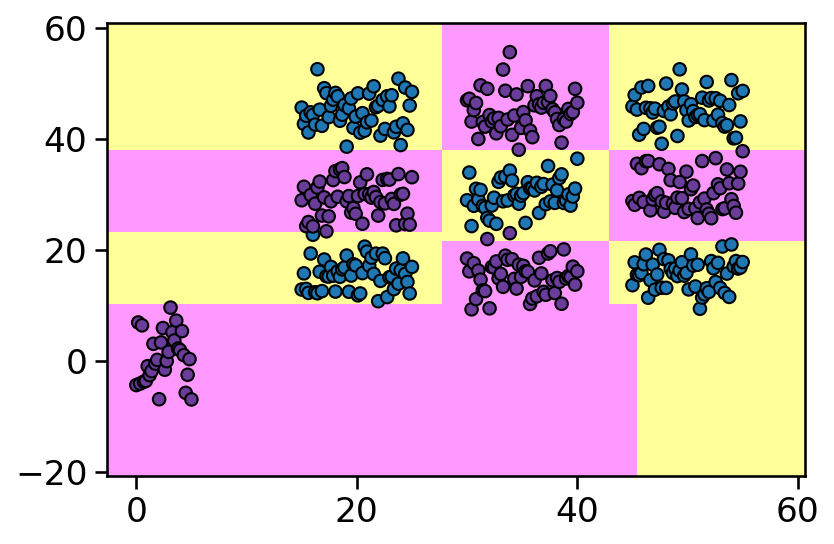

In [110]:
fig, ax = plt.subplots(dpi=150)

ax.pcolormesh(xx, yy, predicted, cmap='spring', alpha=0.4)
ax.scatter(data.x1, data.x2, c=colors[data.mark], edgecolors='black')